# Dependencias

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import matplotlib.image as mpimg

In [2]:
import os
directory = os.getcwd() + "/"
directory 

'/home/dquintani/boligrafica/vacunacion/'

# Variables y Funciones


In [71]:
#VARIABLES

plt.style.use("dark_background")

ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

color_vac_parcial1 = 	"orange"
color_vac_parcial2 = color_vac_parcial1
color_vac_completa1 = "green"
color_vac_completa2 = color_vac_completa1
color_total_dosis1 = "#7ae9c6"
color_total_dosis2 = color_total_dosis1

color3 = "#b37cf3"
color4 = "#7537be"

background_color1 = "black"
background_color2 = "black"

atribucion = "Datos del Ministerio de Salud (Unidos Contra el Covid) vía @mauforonda. Visualización de BoliGráfica"

In [4]:
def annotate_bar(series, axis, text_color="black", fontsize=12, x_offset=0, y_offset=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  for p in axs[axis].patches:
    axs[axis].annotate(start_text + str(p.get_width()) + end_text,
        xy = (p.get_width() + x_offset, p.get_y() + y_offset),
        fontsize = fontsize,
         color = text_color,
          bbox={
            'edgecolor': edgecolor,
            'facecolor': facecolor, 
            'alpha': alpha}
           )


def annotate_last_flat(df, column_index, axis = 0, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5,start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index].astype(int)) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

def annotate_last_nonflat(df, column_index, axis, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

# Revisar Base de Datos (bolcuantas, mauforonda, edu MF2)

## habitantes

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[ordenado]
# habitantes = habitantes.rename(index={:"habitantes"})

#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

#habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

In [6]:
pob_vacunable = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-pruebas/master/data/vaccine.target.population.csv", index_col=0)
pob_vacunable.insert(4,"total vacunable", pob_vacunable.sum(axis=1))
pob_vac = pd.DataFrame(pob_vacunable.iloc[:,-1]).T
pob_vac.insert(0,"Bolivia", pob_vacunable.iloc[:,-1].sum())
pob_vac = pob_vac.rename(columns={"Potosi":"Potosí"})
pob_vac = pob_vac[ordenado]
pob_vac

dept             Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  \
total vacunable  7180432  1928771     1273520     1988115  345890  531057   

dept             Chuquisaca  Tarija    Beni  Pando  
total vacunable      391718  366070  268459  86832

In [7]:
porc_vacunable = pob_vac.div(habitantes.iloc[0])*100
porc_vacunable = porc_vacunable.round(1)
porc_vacunable =porc_vacunable.rename(index={"total vacunable":"porcentaje vacunable"})
porc_vacunable

dept                  Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
porcentaje vacunable     61.8    65.9        62.8        59.0   64.3    58.9   

dept                  Chuquisaca  Tarija  Beni  Pando  
porcentaje vacunable        61.5    62.8  55.9   56.4

## importar BolCuantas

In [8]:
url1_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=0&single=true&output=csv"
url2_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=2002090716&single=true&output=csv"

In [9]:
primeras_BC = pd.read_csv(url1_BC, index_col=0)
primeras_BC = primeras_BC[ordenado]#.fillna(0)
primeras_BC.index = pd.to_datetime(primeras_BC.index, format= "%Y-%m-%d")
primeras_BC

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
fecha                                                                         
2021-02-03     3560.0     361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0    1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0    1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0    1859.0      1369.0      1638.0     412.0     396.0   
2021-02-07     7752.0    1859.0      1369.0      1638.0     499.0     396.0   
...               ...       ...         ...         ...       ...       ...   
2021-08-23  3061404.0  710951.0    553116.0    944214.0  155518.0  143743.0   
2021-08-24  3078404.0  715041.0    557033.0    949602.0  156794.0  144517.0   
2021-08-25  3094427.0  718753.0    560242.0    954638.0  157792.0  145061.0   
2021-08-26  3151833.0  731838.0    570579.0    977697.0  160137.0  146444.0   
2021-08-27  3172621.0  736367.0    574389.0    985890.0  161156.0  147268.0   

            Chuquisaca    Tarija      Beni    Pando  
fecha                                                
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
2021-02-07       530.0     712.0     199.0    550.0  
...                ...       ...       ...      ...  
2021-08-23    181630.0  213071.0  115995.0  43166.0  
2021-08-24    182091.0  213309.0  116728.0  43289.0  
2021-08-25    182492.0  214654.0  117402.0  43393.0  
2021-08-26    184609.0  218374.0  118636.0  43519.0  
2021-08-27    185239.0  219286.0  119397.0  43629.0  

[206 rows x 10 columns]

In [10]:
segundas_BC = pd.read_csv(url2_BC, index_col=0)
segundas_BC = segundas_BC[ordenado]#.fillna(0)
segundas_BC.index = pd.to_datetime(segundas_BC.index, format= "%Y-%m-%d") 

segundas_BC

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
fecha                                                                         
2021-02-03        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-04        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-05        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-06        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-07        NaN       NaN         NaN         NaN       NaN       NaN   
...               ...       ...         ...         ...       ...       ...   
2021-08-23  2328228.0  548842.0    449441.0    742775.0  114896.0   98217.0   
2021-08-24  2401767.0  564750.0    459632.0    767214.0  120276.0  102685.0   
2021-08-25  2480500.0  581474.0    480157.0    788849.0  123711.0  105705.0   
2021-08-26  2522944.0  592702.0    486908.0    798632.0  125508.0  109899.0   
2021-08-27  2600349.0  610148.0    488994.0    805067.0  129412.0  144460.0   

            Chuquisaca    Tarija     Beni    Pando  
fecha                                               
2021-02-03         NaN       NaN      NaN      NaN  
2021-02-04         NaN       NaN      NaN      NaN  
2021-02-05         NaN       NaN      NaN      NaN  
2021-02-06         NaN       NaN      NaN      NaN  
2021-02-07         NaN       NaN      NaN      NaN  
...                ...       ...      ...      ...  
2021-08-23    131504.0  160958.0  55601.0  25994.0  
2021-08-24    136360.0  166393.0  58130.0  26327.0  
2021-08-25    141771.0  171642.0  60189.0  27002.0  
2021-08-26    144978.0  174785.0  61966.0  27566.0  
2021-08-27    149876.0  180762.0  63519.0  28111.0  

[206 rows x 10 columns]

## importar mauforonda


In [11]:
url1_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/primera.csv"
url2_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/segunda.csv"

In [12]:
primeras_MF = pd.read_csv(url1_MF, index_col=0)
primeras_MF = primeras_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
primeras_MF = primeras_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#primeras_MF.index = pd.to_datetime(primeras_MF.index) 

primeras_MF

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
fecha                                                                         
2021-02-03     3560.0     361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0    1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0    1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0    1859.0      1369.0      1638.0     412.0     396.0   
2021-02-07     7752.0    1859.0      1369.0      1638.0     499.0     396.0   
...               ...       ...         ...         ...       ...       ...   
2021-07-15  2528672.0  604986.0    453988.0    757929.0  128125.0  122700.0   
2021-07-16  2568957.0  605422.0    461793.0    778170.0  130128.0  124668.0   
2021-07-17  2574283.0  606804.0    465406.0    773871.0  130582.0  125419.0   
2021-07-18  2598991.0  617441.0    469941.0    780044.0  130797.0  126157.0   
2021-07-19  2638918.0  627083.0    476690.0    793085.0  132690.0  128056.0   

            Chuquisaca    Tarija      Beni    Pando  
fecha                                                
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
2021-02-07       530.0     712.0     199.0    550.0  
...                ...       ...       ...      ...  
2021-07-15    150124.0  169804.0  100446.0  40570.0  
2021-07-16    153351.0  173189.0  101448.0  40788.0  
2021-07-17    154925.0  174760.0  101645.0  40871.0  
2021-07-18    155670.0  176257.0  101800.0  40884.0  
2021-07-19    158466.0  179166.0  102717.0  40965.0  

[167 rows x 10 columns]

In [13]:
segundas_MF = pd.read_csv(url2_MF, index_col=0)
segundas_MF = segundas_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
segundas_MF = segundas_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#segundas_MF.index = pd.to_datetime(segundas_MF.index) 


segundas_MF

Bolivia    La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
fecha                                                                      
2021-02-03       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-04       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-05       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-06       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-07       0.0       0.0         0.0         0.0      0.0      0.0   
...              ...       ...         ...         ...      ...      ...   
2021-07-15  866647.0  217837.0    171603.0    230214.0  48864.0  40441.0   
2021-07-16  895479.0  218058.0    178364.0    243481.0  50393.0  41158.0   
2021-07-17  917488.0  220090.0    178841.0    258928.0  51584.0  41395.0   
2021-07-18  929229.0  221004.0    179066.0    268588.0  51649.0  41682.0   
2021-07-19  980288.0  232590.0    185272.0    293221.0  53101.0  42885.0   

            Chuquisaca   Tarija     Beni    Pando  
fecha                                              
2021-02-03         0.0      0.0      0.0      0.0  
2021-02-04         0.0      0.0      0.0      0.0  
2021-02-05         0.0      0.0      0.0      0.0  
2021-02-06         0.0      0.0      0.0      0.0  
2021-02-07         0.0      0.0      0.0      0.0  
...                ...      ...      ...      ...  
2021-07-15     53214.0  55666.0  33688.0  15120.0  
2021-07-16     55318.0  58768.0  34231.0  15708.0  
2021-07-17     55858.0  60492.0  34345.0  15955.0  
2021-07-18     56222.0  60687.0  34370.0  15961.0  
2021-07-19     57551.0  63792.0  35082.0  16794.0  

[167 rows x 10 columns]

In [14]:
print("bolcuantas dias = " + "{}".format(len(primeras_BC)))
print("maufronda dias= " + "{}".format(len(primeras_MF)))
if len(primeras_BC) > len(primeras_MF):
  primeras = primeras_BC
  segundas = segundas_BC
  print("BolCuantas más actualizada, activada ñie")
elif len(primeras_BC) < len(primeras_MF):
  primeras = primeras_MF
  segundas = segundas_MF
  print("mauforonda más actualizada, activada ñie")

elif len(primeras_BC) == len(primeras_MF):
  primeras = primeras_MF
  segundas = segundas_MF
  print("ambas igual de actualizadas, mauforonda activada ñie")

bolcuantas dias = 206
maufronda dias= 167
BolCuantas más actualizada, activada ñie


## importar eduarrayas vaccinations.csv

In [15]:
# df_vac_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/vaccinations.csv", 
#     header=[0, 1], 
#     index_col=[0])

# df_vac_edu.index = pd.to_datetime(df_vac_edu.index)

# vaccinations_df_columns = df_vac_edu.columns.map(lambda _: [__.lower() for __ in _])
# df_vac_edu.columns = pd.MultiIndex.from_tuples([*vaccinations_df_columns.values])

# df_vac_edu = df_vac_edu.interpolate()

# df_vac_edu

In [16]:
# # df_vac_edu_bolivia = df_vac_edu.iloc[:,-3:]
# # df_vac_edu_bolivia.columns = df_vac_edu_bolivia.columns.rename("bolivia", level=0)

# df_vac_edu_bolivia = df_vac_edu.groupby(level=1, axis=1, sort=False).sum()
# df_vac_edu_bolivia
# #pd.concat([df_vac_edu, df_vac_edu_bolivia], axis=1, levels=1)

In [17]:
# total_bolivia = df_vac_edu.groupby(level=1, axis=1).sum()
# total_bolivia.columns = pd.MultiIndex.from_product([
# ['bolivia'], total_bolivia.columns])
# pd.concat([df_vac_edu, total_bolivia], axis=1)

In [18]:
# plt.style.use("dark_background")
# fig, axs = plt.subplots(4,3,figsize=(20,15))
# axs = axs.flatten()

# fig.suptitle("Vacunación contra el COVID-19 en Bolivia", fontsize =24, y=1.03)

# #fig.set_facecolor("grey")
# gs = fig.add_gridspec(nrows=4, ncols=3)
# axs1 = fig.add_subplot(gs[0,0:3])

# list1 = ["la paz", "cochabamba","santa cruz", "oruro", "potosi","tarija","chuquisaca","beni","pando"]

# axs1.plot(df_vac_edu_bolivia.index, df_vac_edu_bolivia.diff().rolling(7).mean(), label= df_vac_edu_bolivia.columns)
# axs1.legend()
# axs1.set_title("Bolivia")
# axs[0].axis('off')
# axs[1].axis('off')
# axs[2].axis('off')

# for i in range(9):
#     axs[i+3].plot(df_vac_edu.index, df_vac_edu[list1[i]].diff().rolling(7).mean(), label = df_vac_edu[list1[i]].columns)
#     axs[i+3].set_title(list1[i])
#     axs[i+3].legend()
    


# fig.tight_layout()


In [19]:
# df_vac_edu["pando"]["primera"].loc[:"2021-05-15"]
# #aprox 30500 vacunadas en pando con primera dosis (vacunas bidosis) hasta el 15 de mayo

In [20]:
# df_vac_edu["pando"]["segunda"].loc["2021-06-01":]
# #aprox 5,000 personas no recibieron su segunda dosis???

In [21]:
# len(df_vac_edu)

In [22]:
# df_vac_edu_fix = pd.concat([df_vac_edu, df_vac_edu_bolivia], axis=0)
# df_vac_edu_fix

## IMPORTAR MAUFORONDA 2

In [23]:
url_MF2 = "https://raw.githubusercontent.com/mauforonda/vacunas_unidoscontraelcovid/master/consolidado/vacunas.csv"
MF2 = pd.read_csv(url_MF2, index_col=0)
MF2.index = pd.to_datetime(MF2.index)
MF2

tipo departamento   dosis
fecha                                   
2021-02-03  primera         Beni      48
2021-02-03  primera   Chuquisaca     303
2021-02-03  primera   Cochabamba     687
2021-02-03  primera       La Paz     361
2021-02-03  primera        Oruro     106
...             ...          ...     ...
2021-09-08    única        Oruro   29728
2021-09-08    única        Pando       0
2021-09-08    única       Potosi   60554
2021-09-08    única   Santa Cruz  317997
2021-09-08    única       Tarija   29297

[4041 rows x 3 columns]

Bolivia    Beni  Chuquisaca  Cochabamba  La Paz   Oruro  Pando  \
2021-02-03     3560      48         303         687     361     106    388   
2021-02-04     5172      63         304        1044    1030     195    488   
2021-02-05     7430     154         529        1369    1783     300    550   
2021-02-06     7636     170         530        1369    1859     412    550   
2021-02-07     7752     199         530        1369    1859     499    550   
...             ...     ...         ...         ...     ...     ...    ...   
2021-09-03  3272517  125325      197447      588961  759013  165766  45869   
2021-09-04  3276752  125639      197922      589022  759798  166371  46283   
2021-09-05  3277301  125664      197935      589022  759844  166564  46283   
2021-09-06  3282322  126021      198442      589044  760749  167277  46832   
2021-09-08  3294119  127077      199442      589891  764066  168697  47309   

            Potosí  Santa Cruz  Tarija  
2021-02-03     203        1264     200  
2021-02-04     293        1393     362  
2021-02-05     396        1638     711  
2021-02-06     396        1638     712  
2021-02-07     396        1638     712  
...            ...         ...     ...  
2021-09-03  166007     1001617  222512  
2021-09-04  167140     1001679  222898  
2021-09-05  167356     1001693  222940  
2021-09-06  168559     1001759  223639  
2021-09-08  170703     1001860  225074  

[201 rows x 10 columns]

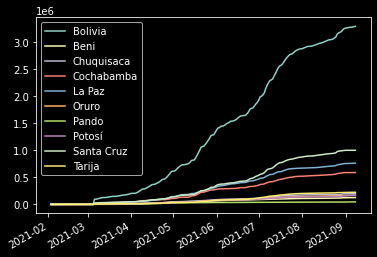

In [24]:
lista_dptm = list(MF2.groupby("departamento").count().index.array)

primera = pd.DataFrame()

for i in ["primera"]:
    for k in range(len(lista_dptm)):
        primerax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        primera = pd.concat([primera, primerax], axis=1)

primeras = primera.rename(columns={"Potosi": "Potosí"})
primeras.index = pd.to_datetime(primeras.index)

primeras.insert(0,"Bolivia",primeras.sum(axis=1))
primeras.plot()


primeras

Bolivia   Beni  Chuquisaca  Cochabamba  La Paz   Oruro  Pando  \
2021-02-22      210      0          10          24      12       0     85   
2021-02-23     1030      6         122         166      31      25    239   
2021-02-24     2634     42         276         588     264      99    349   
2021-02-25     6630     43         299        1320    1918     281    439   
2021-02-28     7702    237         524        1320    1918     487    515   
...             ...    ...         ...         ...     ...     ...    ...   
2021-09-03  2043146  69029      140777      378476  485585  114879  30822   
2021-09-04  2051842  69765      141376      379161  487996  115337  30952   
2021-09-05  2053791  69819      141408      379281  488232  115373  30952   
2021-09-06  2067530  70945      142272      381382  490839  115871  31037   
2021-09-08  2109911  73056      144569      391410  500069  117198  31263   

            Potosí  Santa Cruz  Tarija  
2021-02-22      54           0      25  
2021-02-23     123         244      74  
2021-02-24     173         619     224  
2021-02-25     265        1664     401  
2021-02-28     365        1664     672  
...            ...         ...     ...  
2021-09-03  112605      548501  162472  
2021-09-04  114133      550250  162872  
2021-09-05  114404      551397  162925  
2021-09-06  116398      554820  163966  
2021-09-08  119985      565876  166485  

[193 rows x 10 columns]

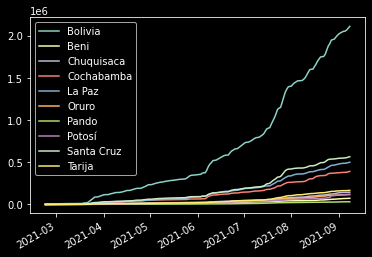

In [25]:
segunda = pd.DataFrame()

for i in ["segunda"]:
    for k in range(len(lista_dptm)):
        segundax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        segunda = pd.concat([segunda, segundax], axis=1)

segundas = segunda.rename(columns={"Potosi": "Potosí"})
segundas.index = pd.to_datetime(segundas.index)
segundas.insert(0,"Bolivia",segundas.sum(axis=1))
segundas.plot()

segundas

Bolivia    Beni  Chuquisaca  Cochabamba    La Paz    Oruro  \
2021-09-03  790386.0  3201.0     29131.0    139057.0  188089.0  28794.0   
2021-09-04  795846.0  3420.0     29328.0    140025.0  190608.0  29066.0   
2021-09-05  797072.0  3420.0     29349.0    140321.0  191259.0  29097.0   
2021-09-06  803466.0  3706.0     29647.0    141719.0  193696.0  29443.0   
2021-09-08  812546.0  4013.0     30168.0    143623.0  197166.0  29728.0   

            Pando   Potosí  Santa Cruz   Tarija  
2021-09-03    0.0  56970.0    317732.0  27412.0  
2021-09-04    0.0  57763.0    317830.0  27806.0  
2021-09-05    0.0  57985.0    317835.0  27806.0  
2021-09-06    0.0  58986.0    317869.0  28400.0  
2021-09-08    0.0  60554.0    317997.0  29297.0

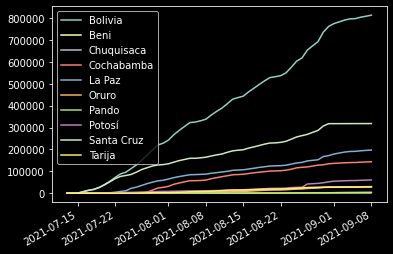

In [26]:
unica = pd.DataFrame()

for i in ["única"]:
    for k in range(len(lista_dptm)):
        unicax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        unica = pd.concat([unica, unicax], axis=1)

unicas = unica.rename(columns={"Potosi": "Potosí"})
unicas.index = pd.to_datetime(unicas.index)
unicas.insert(0,"Bolivia",unicas.sum(axis=1))
unicas.plot()

unicas = unicas.div(primeras/primeras).fillna(0)

unicas.tail()

# Consolidar (segundas_alt = TRUE!)

In [27]:
segundas = segundas

## Consolidar

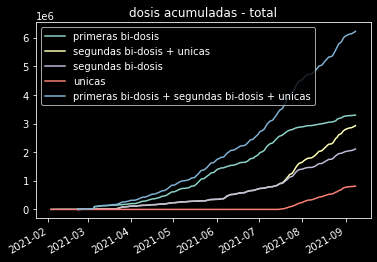

In [28]:
#DOSIS ACUMULADAS TOTAL
primeras_acum = primeras
segundas_acum = segundas + unicas
unicas_acum = unicas
segundas_acum_alt = segundas
ambas_acum = primeras + segundas + unicas

primeras_acum.index = pd.to_datetime(primeras_acum.index) 
segundas_acum.index = pd.to_datetime(segundas_acum.index)
segundas_acum_alt.index = pd.to_datetime(segundas_acum_alt.index)

ambas_acum.index = pd.to_datetime(ambas_acum.index)

plt.title("dosis acumuladas - total")
primeras_acum.Bolivia.plot(label="primeras bi-dosis")
segundas_acum.Bolivia.plot(label="segundas bi-dosis + unicas")
segundas_acum_alt.Bolivia.plot(label="segundas bi-dosis")
unicas_acum.Bolivia.plot(label="unicas")
ambas_acum.Bolivia.plot(label="primeras bi-dosis + segundas bi-dosis + unicas")
plt.legend()

# ambas_acum

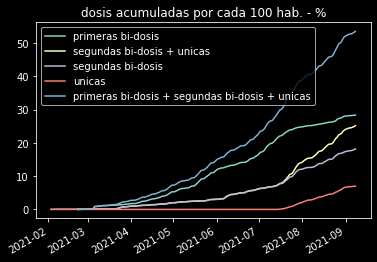

In [29]:
#DOSIS ACUMULADAS POR CADA 100 habitantes
primeras_acum_pc = primeras_acum.div(habitantes.iloc[0])*100
segundas_acum_pc = segundas_acum.div(habitantes.iloc[0])*100
segundas_acum_pc_alt = segundas_acum_alt.div(habitantes.iloc[0])*100
unicas_acum_pc = unicas_acum.div(habitantes.iloc[0])*100
ambas_acum_pc = ambas_acum.div(habitantes.iloc[0]) * 100

plt.title("dosis acumuladas por cada 100 hab. - %")
primeras_acum_pc.Bolivia.plot(label="primeras bi-dosis")
segundas_acum_pc.Bolivia.plot(label="segundas bi-dosis + unicas")
segundas_acum_pc_alt.Bolivia.plot(label="segundas bi-dosis")
unicas_acum_pc.Bolivia.plot(label="unicas")
ambas_acum_pc.Bolivia.plot(label="primeras bi-dosis + segundas bi-dosis + unicas")
plt.legend()
# ambas_acum_pc

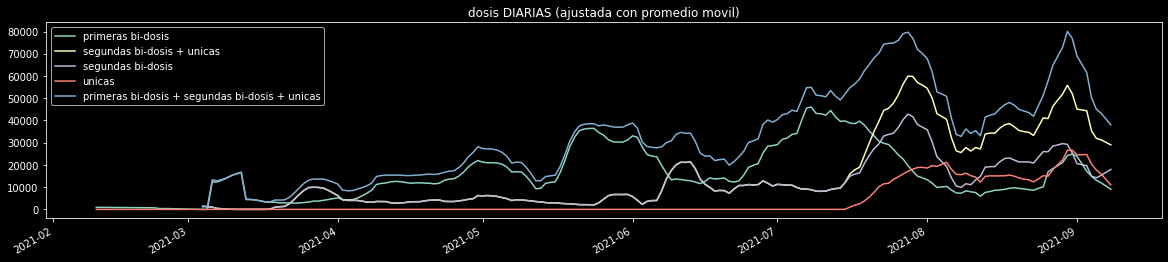

In [30]:
#DOSIS DIARIAS TOTAL
primeras_dia = primeras_acum.diff()
segundas_dia =  segundas_acum.diff()
segundas_dia_alt = segundas_acum_alt.diff()
unicas_dia = unicas_acum.diff()
ambas_dia = ambas_acum.diff()

plt.rcParams['figure.figsize'] = (20,4)
plt.title("dosis DIARIAS (ajustada con promedio movil)")
primeras_dia.Bolivia.rolling(7).mean().plot(label="primeras bi-dosis")
segundas_dia.Bolivia.rolling(7).mean().plot(label="segundas bi-dosis + unicas")
segundas_dia_alt.Bolivia.rolling(7).mean().plot(label="segundas bi-dosis")
unicas_dia.Bolivia.rolling(7).mean().plot(label="unicas")
ambas_dia.Bolivia.rolling(7).mean().plot(label="primeras bi-dosis + segundas bi-dosis + unicas")
plt.legend()

# ambas_dia

In [31]:
# DIARIAS POR CADA 100 HABITANTES - no graph here
primeras_dia_pc = primeras_dia.div(habitantes.iloc[0])*100
segundas_dia_pc = segundas_dia.div(habitantes.iloc[0])*100
segundas_dia_pc_alt = segundas_dia_alt.div(habitantes.iloc[0])*100
unicas_dia_pc = unicas_dia.div(habitantes.iloc[0])*100
ambas_dia_pc = ambas_dia.div(habitantes.iloc[0])*100

# ambas_dia_pc.Bolivia.plot()
# ambas_dia_pc

## almenos una dosis y COMPLETA- NUEVO!

Bolivia      Beni  Chuquisaca  Cochabamba    La Paz     Oruro  \
2021-02-03     3560.0      48.0       303.0       687.0     361.0     106.0   
2021-02-04     5172.0      63.0       304.0      1044.0    1030.0     195.0   
2021-02-05     7430.0     154.0       529.0      1369.0    1783.0     300.0   
2021-02-06     7636.0     170.0       530.0      1369.0    1859.0     412.0   
2021-02-07     7752.0     199.0       530.0      1369.0    1859.0     499.0   
...               ...       ...         ...         ...       ...       ...   
2021-09-03  4062903.0  128526.0    226578.0    728018.0  947102.0  194560.0   
2021-09-04  4072598.0  129059.0    227250.0    729047.0  950406.0  195437.0   
2021-09-05  4074373.0  129084.0    227284.0    729343.0  951103.0  195661.0   
2021-09-06  4085788.0  129727.0    228089.0    730763.0  954445.0  196720.0   
2021-09-08  4106665.0  131090.0    229610.0    733514.0  961232.0  198425.0   

              Pando    Potosí  Santa Cruz    Tarija  
2021-02-03    388.0     203.0      1264.0     200.0  
2021-02-04    488.0     293.0      1393.0     362.0  
2021-02-05    550.0     396.0      1638.0     711.0  
2021-02-06    550.0     396.0      1638.0     712.0  
2021-02-07    550.0     396.0      1638.0     712.0  
...             ...       ...         ...       ...  
2021-09-03  45869.0  222977.0   1319349.0  249924.0  
2021-09-04  46283.0  224903.0   1319509.0  250704.0  
2021-09-05  46283.0  225341.0   1319528.0  250746.0  
2021-09-06  46832.0  227545.0   1319628.0  252039.0  
2021-09-08  47309.0  231257.0   1319857.0  254371.0  

[201 rows x 10 columns]

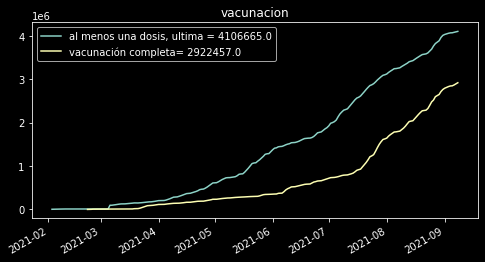

In [32]:
almenos_una = primeras + unicas
almenos_una_acum = almenos_una

completa = segundas + unicas
completa_acum = completa

plt.rcParams['figure.figsize'] = (8,4)
plt.title("vacunacion")
almenos_una_acum.Bolivia.plot(label="al menos una dosis, ultima = {}".format(almenos_una_acum.Bolivia[-1]))
completa_acum.Bolivia.plot(label="vacunación completa= {}".format(completa_acum.Bolivia[-1]))
plt.legend()

almenos_una_acum

In [33]:
# almenos_una_dia = almenos_una_acum.diff()
# completa_dia = completa_acum.diff()
# almenos_una_dia.Bolivia.plot()
# completa_dia.Bolivia.plot()
# # almenos_una_dia

In [34]:
# almenos_una_pc_dia = almenos_una_dia.div(habitantes.iloc[0])*100
# almenos_una_pc_dia.plot()
# almenos_una_pc_dia


<AxesSubplot:>

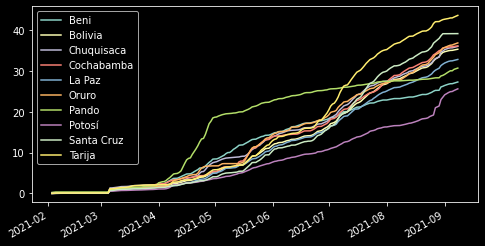

In [35]:
almenos_una_pc_acum = almenos_una_acum.div(habitantes.iloc[0])*100
completa_pc_acum = completa_acum.div(habitantes.iloc[0])*100

almenos_una_vacunable_acum = almenos_una_acum.div(pob_vac.iloc[0])*100
completa_vacunable_acum = completa_acum.div(pob_vac.iloc[0])*100


almenos_una_pc_acum.plot()

## VACUNACION COMPLETA

## RESUMEN NACIONAL

Primeras Dosis Diarias  Primeras Dosis Acumulado  \
2021-02-03                     NaN                      3560   
2021-02-04                  1612.0                      5172   
2021-02-05                  2258.0                      7430   
2021-02-06                   206.0                      7636   
2021-02-07                   116.0                      7752   
...                            ...                       ...   
2021-09-03                 11141.0                   3272517   
2021-09-04                  4235.0                   3276752   
2021-09-05                   549.0                   3277301   
2021-09-06                  5021.0                   3282322   
2021-09-08                 11797.0                   3294119   

            Primeras Dosis Acumulado, % poblacion  Segundas y Janssen Diarias  \
2021-02-03                               0.030637                         NaN   
2021-02-04                               0.044509                         NaN   
2021-02-05                               0.063941                         NaN   
2021-02-06                               0.065714                         NaN   
2021-02-07                               0.066713                         NaN   
...                                           ...                         ...   
2021-09-03                              28.162797                     37252.0   
2021-09-04                              28.199243                     14156.0   
2021-09-05                              28.203967                      3175.0   
2021-09-06                              28.247177                     20133.0   
2021-09-08                              28.348701                     51461.0   

            Segundas y Janssen Acumulada  \
2021-02-03                           NaN   
2021-02-04                           NaN   
2021-02-05                           NaN   
2021-02-06                           NaN   
2021-02-07                           NaN   
...                                  ...   
2021-09-03                     2833532.0   
2021-09-04                     2847688.0   
2021-09-05                     2850863.0   
2021-09-06                     2870996.0   
2021-09-08                     2922457.0   

            Segundas y Janssen Acumulado, % Poblacion  Dosis Todas Diarias  \
2021-02-03                                        NaN                  NaN   
2021-02-04                                        NaN                  NaN   
2021-02-05                                        NaN                  NaN   
2021-02-06                                        NaN                  NaN   
2021-02-07                                        NaN                  NaN   
...                                               ...                  ...   
2021-09-03                                  24.384957              48393.0   
2021-09-04                                  24.506781              18391.0   
2021-09-05                                  24.534105               3724.0   
2021-09-06                                  24.707367              25154.0   
2021-09-08                                  25.150232              63258.0   

            Dosis Todas Acumuladas  
2021-02-03                     NaN  
2021-02-04                     NaN  
2021-02-05                     NaN  
2021-02-06                     NaN  
2021-02-07                     NaN  
...                            ...  
2021-09-03               6106049.0  
2021-09-04               6124440.0  
2021-09-05               6128164.0  
2021-09-06               6153318.0  
2021-09-08               6216576.0  

[201 rows x 8 columns]

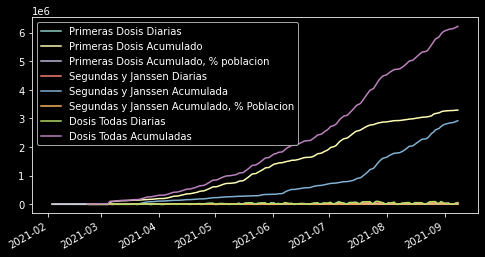

In [36]:
#RESUMEN NACIONAL
vacunacion_BO_df = pd.concat([primeras_dia.Bolivia,
                              primeras_acum.Bolivia,
                              primeras_acum_pc.Bolivia,
                              segundas_dia.Bolivia,
                              segundas_acum.Bolivia,
                              segundas_acum_pc.Bolivia,
                              ambas_dia.Bolivia,
                              ambas_acum.Bolivia,
                              ambas_acum_pc.Bolivia,
                              ], 
                             axis=1, 
                             keys = ["Primeras Dosis Diarias", 
                                     "Primeras Dosis Acumulado", 
                                     "Primeras Dosis Acumulado, % poblacion",
                                     "Segundas y Janssen Diarias",
                                     "Segundas y Janssen Acumulada", 
                                     "Segundas y Janssen Acumulado, % Poblacion",
                                     "Dosis Todas Diarias",
                                     "Dosis Todas Acumuladas"])

vacunacion_BO_df.plot()
vacunacion_BO_df

# Comparación

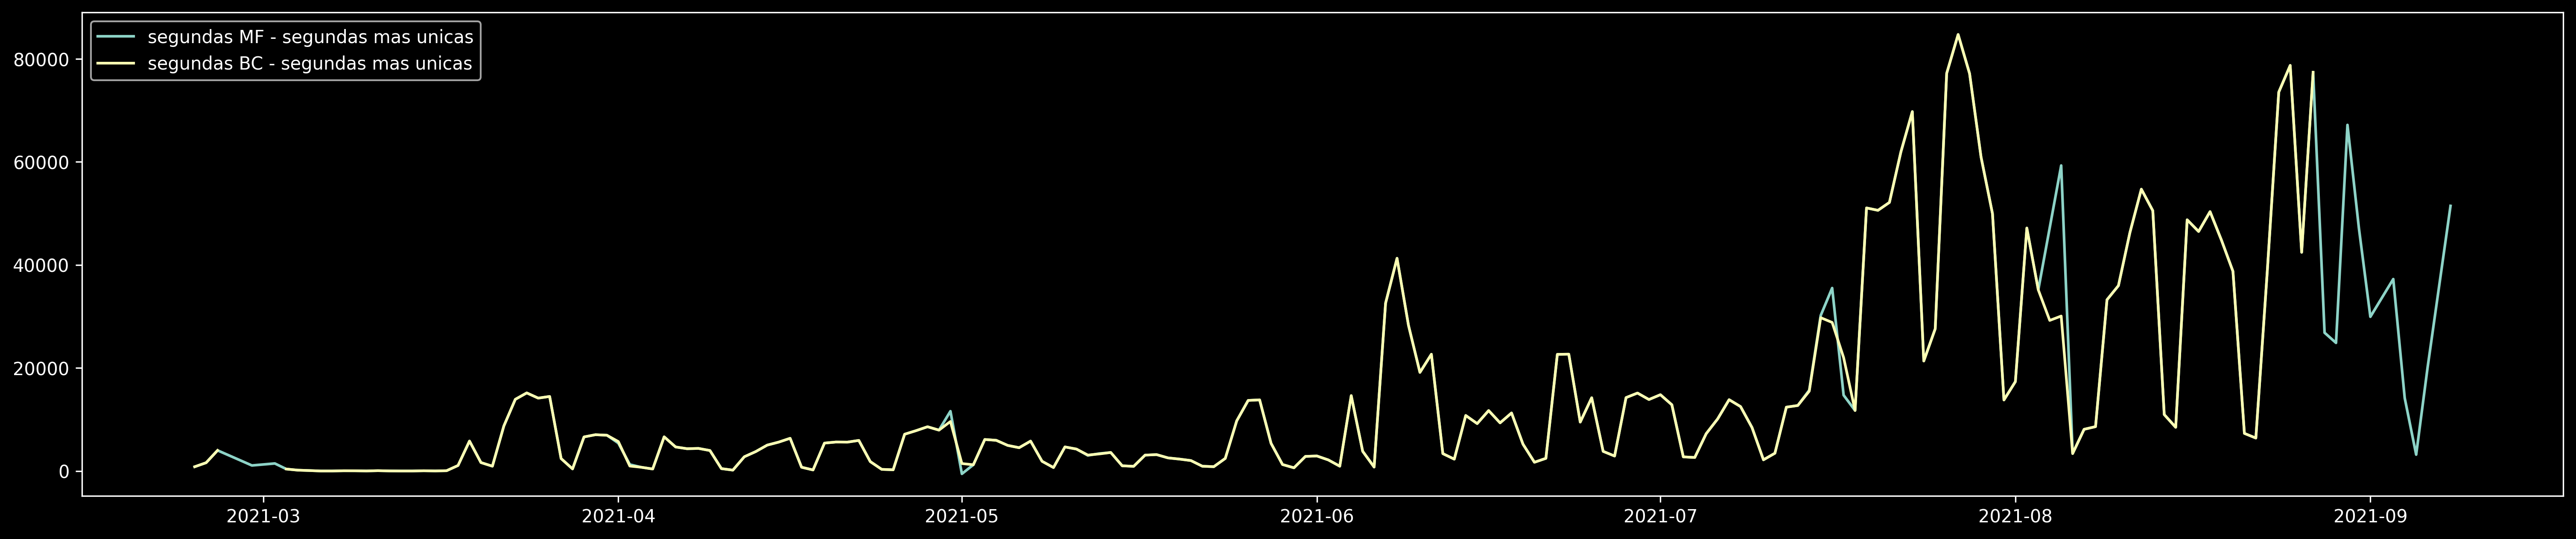

In [37]:
primeras_BC
segundas_BC

fig, axs = plt.subplots(1,1, figsize=(25,5), dpi=300)

#plt.rcParams['lines.linestyle'] = '--'
axs.plot(segundas_acum.diff().Bolivia, label="segundas MF - segundas mas unicas")
axs.plot(segundas_BC.diff().Bolivia, label="segundas BC - segundas mas unicas")
# axs.plot(primeras_acum.diff().Bolivia, label="primeras MF")
# axs.plot(primeras_BC.diff().Bolivia, label="primeras BC")

axs.legend()

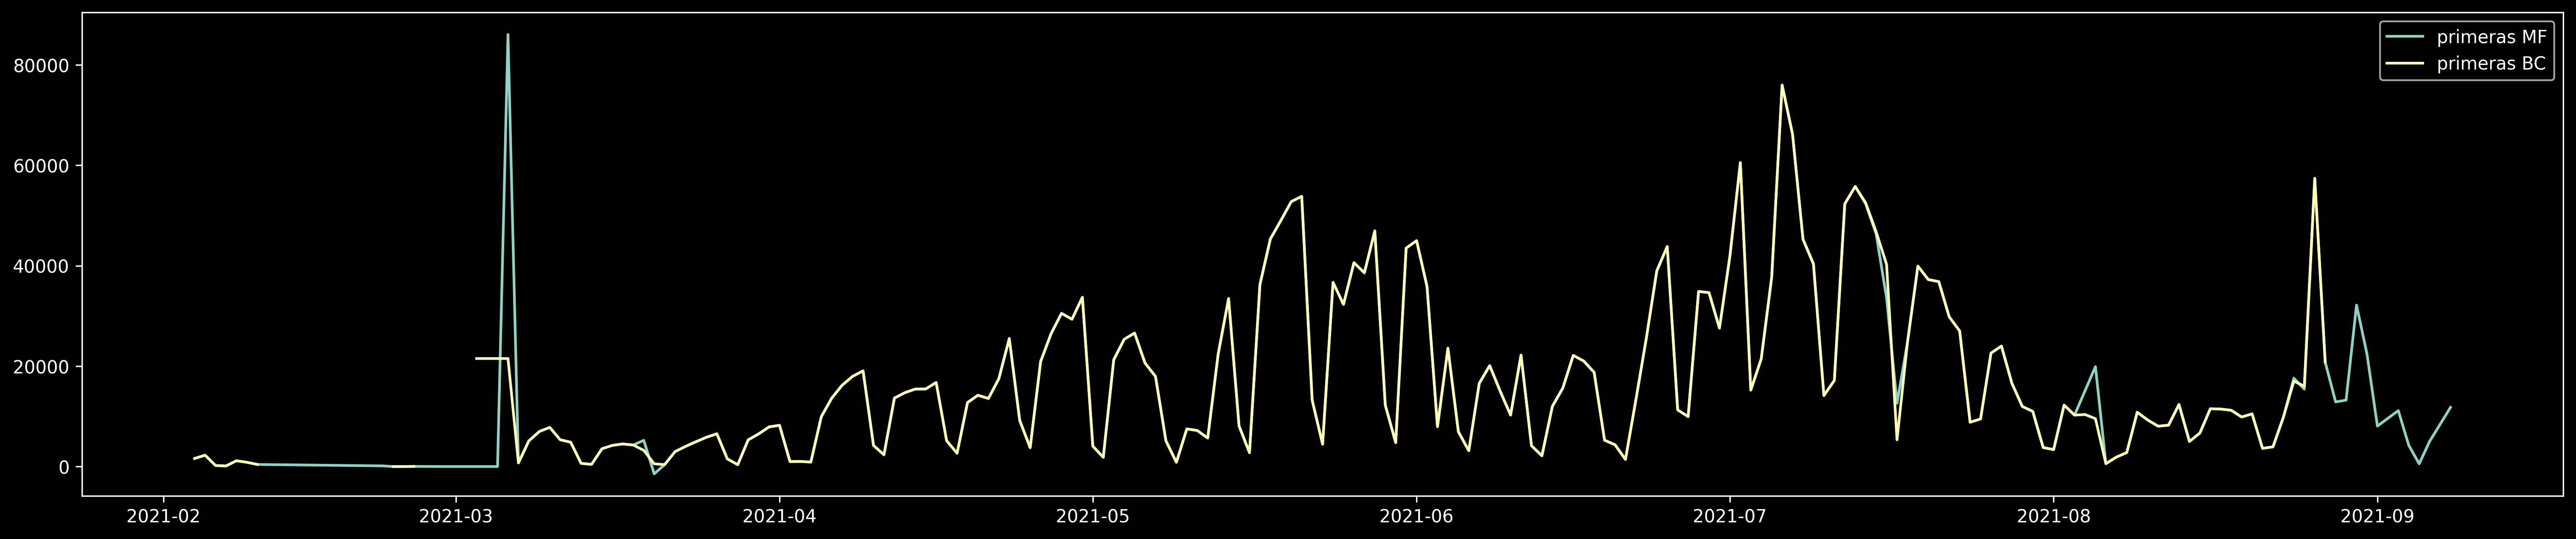

In [38]:
fig, axs = plt.subplots(1,1, figsize=(25,5), dpi=300)

# axs.plot(primeras.Bolivia, label="primeras MF")
# axs.plot(primeras_BC.Bolivia, label="primeras BC")
axs.plot(primeras_acum.diff().Bolivia, label="primeras MF")
axs.plot(primeras_BC.diff().Bolivia, label="primeras BC")
axs.legend()

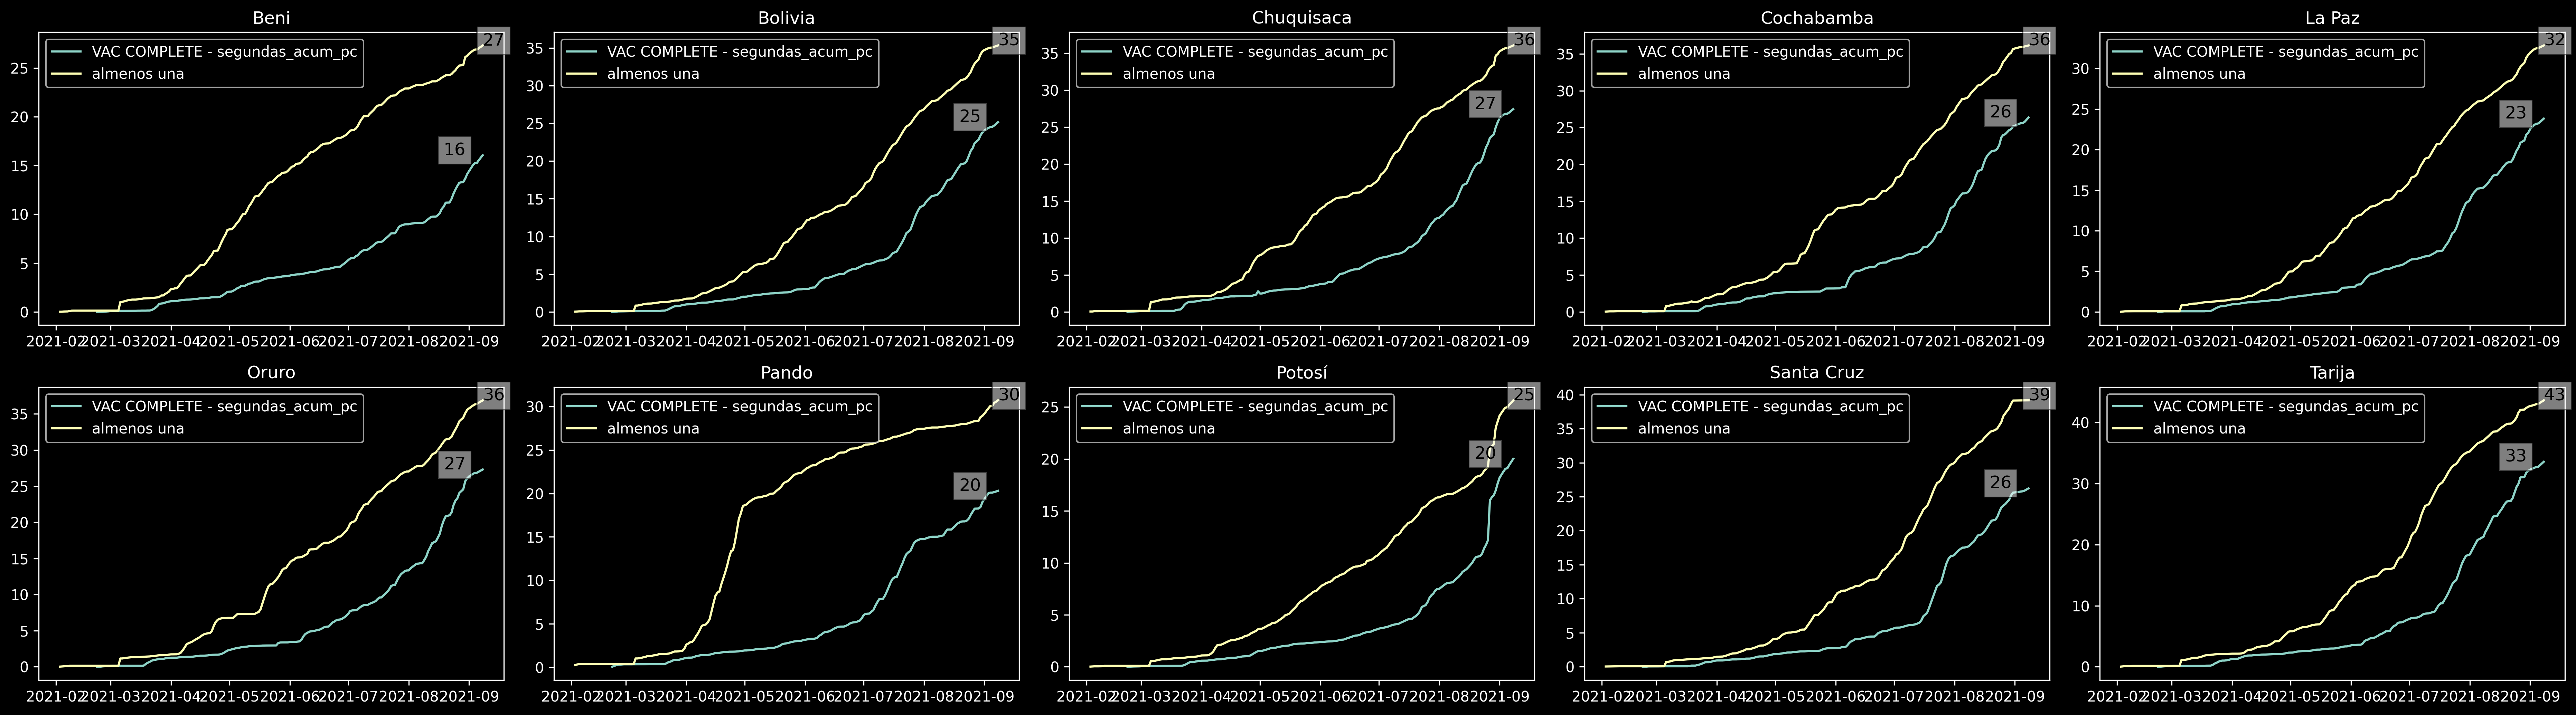

In [39]:
fig, axs = plt.subplots(2,5, figsize=(25,7), dpi=300)
axs = axs.flatten()

for i in range(10):
    axs[i].set_title(segundas_acum_pc.columns[i])
    axs[i].plot(segundas_acum_pc.iloc[:,i], label="VAC COMPLETE - segundas_acum_pc")
    axs[i].plot(almenos_una_pc_acum.iloc[:,i], label="almenos una")
    axs[i].legend()
    annotate_last_flat(almenos_una_pc_acum,i, axis=i,offset_days=0)
    annotate_last_flat(segundas_acum_pc,i, axis=i,offset_days=-20)
    
fig.tight_layout()

# Guardar Datos en .CSV

In [40]:
folder=""

primeras_acum.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Acumuladas.csv")
primeras_acum_pc.round(2).to_csv(directory + folder + "Primeras_Acumuladas_PorCada100Hab.csv")
primeras_dia.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Diario.csv")
primeras_dia_pc.round(2).to_csv(directory + folder + "Primeras_Diario_PorCada100Hab.csv")

segundas_acum.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Acumuladas.csv")
segundas_acum_pc.round(2).to_csv(directory + folder + "Segundas_Acumuladas_PorCada100Hab.csv")
segundas_dia.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Diario.csv")
segundas_dia_pc.round(2).to_csv(directory + folder + "Segundas_Diario_PorCada100Hab.csv")

ambas_acum.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Acumuladas.csv")
ambas_acum_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Acumuladas_PorCada100Hab.csv")
ambas_dia.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Diarias.csv")
ambas_dia_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Diarias_PorCada100Hab.csv")

vacunacion_BO_df.round(1).to_csv(directory + folder + "Resumen_Nacional_Bolivia_Vacuna.csv")

## Ultima Actualización

In [41]:
ultima_actualizacion = "última actualización: {}".format(primeras_acum.index[-1].date())
ultima_actualizacion

'última actualización: 2021-09-08'

# Gráficas


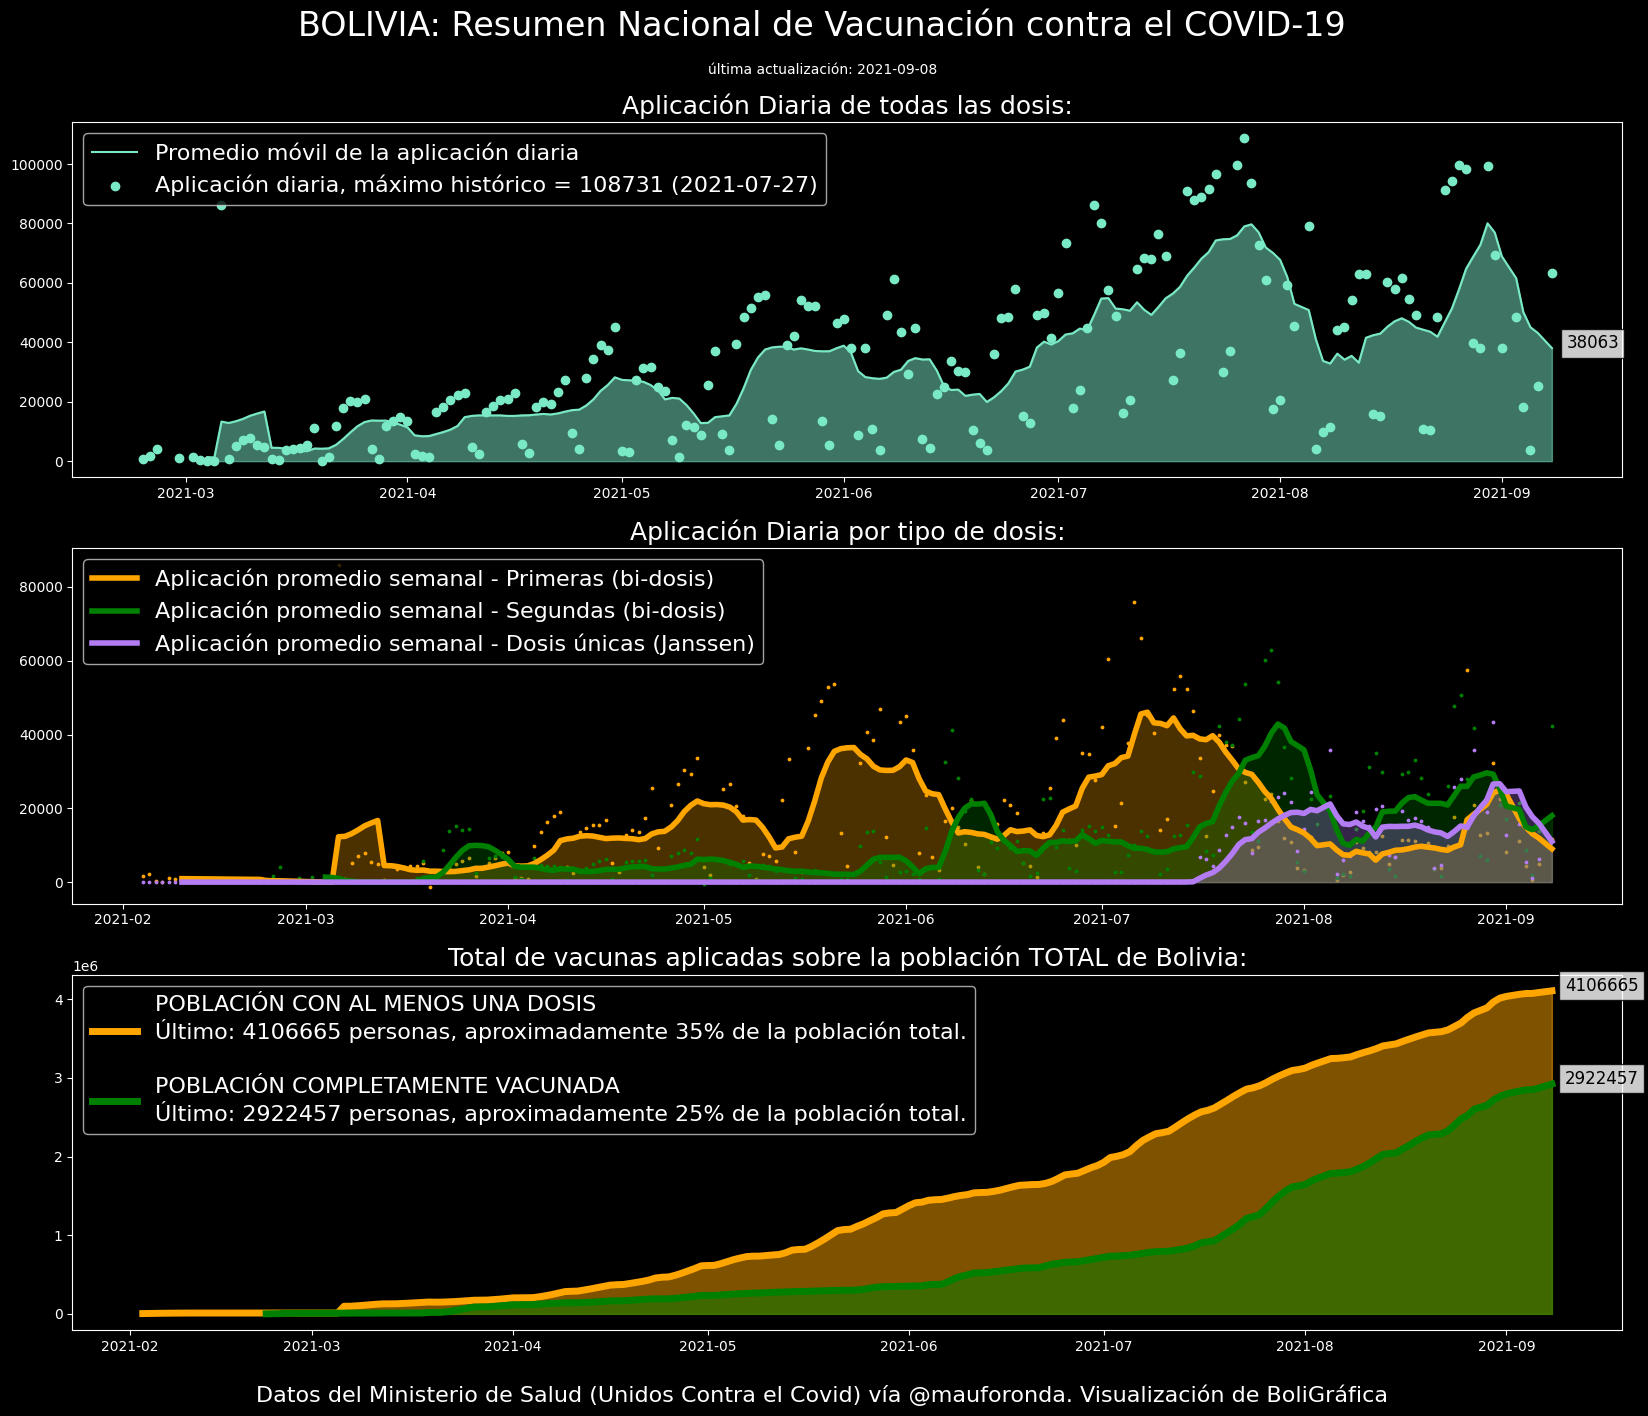

In [72]:
fig, axs = plt.subplots(3,1, sharex=False,
                        figsize=(20,16),
                        dpi=100
                        )

axs = axs.flatten()

fig.suptitle("BOLIVIA: Resumen Nacional de Vacunación contra el COVID-19", fontsize = 24, y=.95)
fig.text(0.5,.91,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.08,horizontalalignment='center',s=atribucion, fontsize=16)

fig.set_facecolor(background_color1)




#axs[0].grid(zorder=0)
axs[0].set_title("Aplicación Diaria de todas las dosis:", fontsize=18)
axs[0].scatter(ambas_dia.index, ambas_dia.Bolivia, color=color_total_dosis1, label="Aplicación diaria, máximo histórico = {} ({})".format(ambas_dia.Bolivia.fillna(0).astype(int).max(), ambas_dia.Bolivia.idxmax().date())) 
axs[0].plot(ambas_dia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2,label="Promedio móvil de la aplicación diaria")
axs[0].fill_between(ambas_dia.Bolivia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2, alpha=.5)
axs[0].legend(fontsize=16)
annotate_last_flat(df=ambas_dia.rolling(7).mean().fillna(0).astype(int), column_index=0, axis = 0, offset_days=2, alpha=.8)



#axs[1].grid(zorder=0)
axs[1].set_title("Aplicación Diaria por tipo de dosis:", fontsize=18)
axs[1].scatter(primeras_dia.index, primeras_dia.Bolivia, color=color_vac_parcial1, s = 3) 
axs[1].plot(primeras_dia.index, primeras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_parcial2, label="Aplicación promedio semanal - Primeras (bi-dosis)", linewidth=4)
axs[1].fill_between(primeras_dia.Bolivia.index, primeras_dia.Bolivia.rolling(7).mean(), color=color_vac_parcial2, alpha=.3)
# annotate_last_flat(df=primeras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)

axs[1].scatter(segundas_dia_alt.index, segundas_dia_alt.Bolivia, color=color_vac_completa1, s = 3) 
axs[1].plot(segundas_dia_alt.index, segundas_dia_alt.Bolivia.interpolate().rolling(7).mean(), color=color_vac_completa2,label="Aplicación promedio semanal - Segundas (bi-dosis)", linewidth=4)
axs[1].fill_between(segundas_dia_alt.Bolivia.index, segundas_dia_alt.Bolivia.rolling(7).mean(), color=color_vac_completa2, alpha=.3)
axs[1].legend(fontsize=16, loc="upper left")
# annotate_last_flat(df=segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)

axs[1].scatter(unicas_dia.index, unicas_dia.Bolivia, color=color3, s = 3) 
axs[1].plot(unicas_dia.index, unicas_dia.Bolivia.interpolate().rolling(7).mean(), color=color3,label="Aplicación promedio semanal - Dosis únicas (Janssen)", linewidth=4)
axs[1].fill_between(unicas_dia.Bolivia.index, unicas_dia.Bolivia.rolling(7).mean(), color=color3, alpha=.3)
axs[1].legend(fontsize=16, loc="upper left")
# annotate_last_flat(df=unicas_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)




#axs[2].grid(zorder=1)
axs[2].set_title("Total de vacunas aplicadas sobre la población TOTAL de Bolivia:", fontsize=18)
axs[2].plot(almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial2, linewidth=5, 
            label="POBLACIÓN CON AL MENOS UNA DOSIS\nÚltimo: {} personas, aproximadamente {}% de la población total.\n".format(almenos_una_acum.Bolivia[-1].astype(int),almenos_una_pc_acum.Bolivia[-1].astype(int)))
axs[2].fill_between(almenos_una_acum.Bolivia.index, almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial1, alpha=.5)

annotate_last_flat(df=almenos_una_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.8,
                   #end_text="{} segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round())
                   )

axs[2].plot(segundas_acum.Bolivia.interpolate(), color=color_vac_completa2,linewidth=5, 
            label="POBLACIÓN COMPLETAMENTE VACUNADA \nÚltimo: {} personas, aproximadamente {}% de la población total.".format(segundas_acum.Bolivia[-1].astype(int),segundas_acum_pc.Bolivia[-1].astype(int)))
axs[2].fill_between(segundas_acum.Bolivia.index, segundas_acum.Bolivia.interpolate(), color=color_vac_completa1, alpha=.5)
axs[2].legend(fontsize=16)
annotate_last_flat(df=segundas_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.8,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

fig.savefig(directory + "resumen_nacional.jpg", bbox_inches="tight")

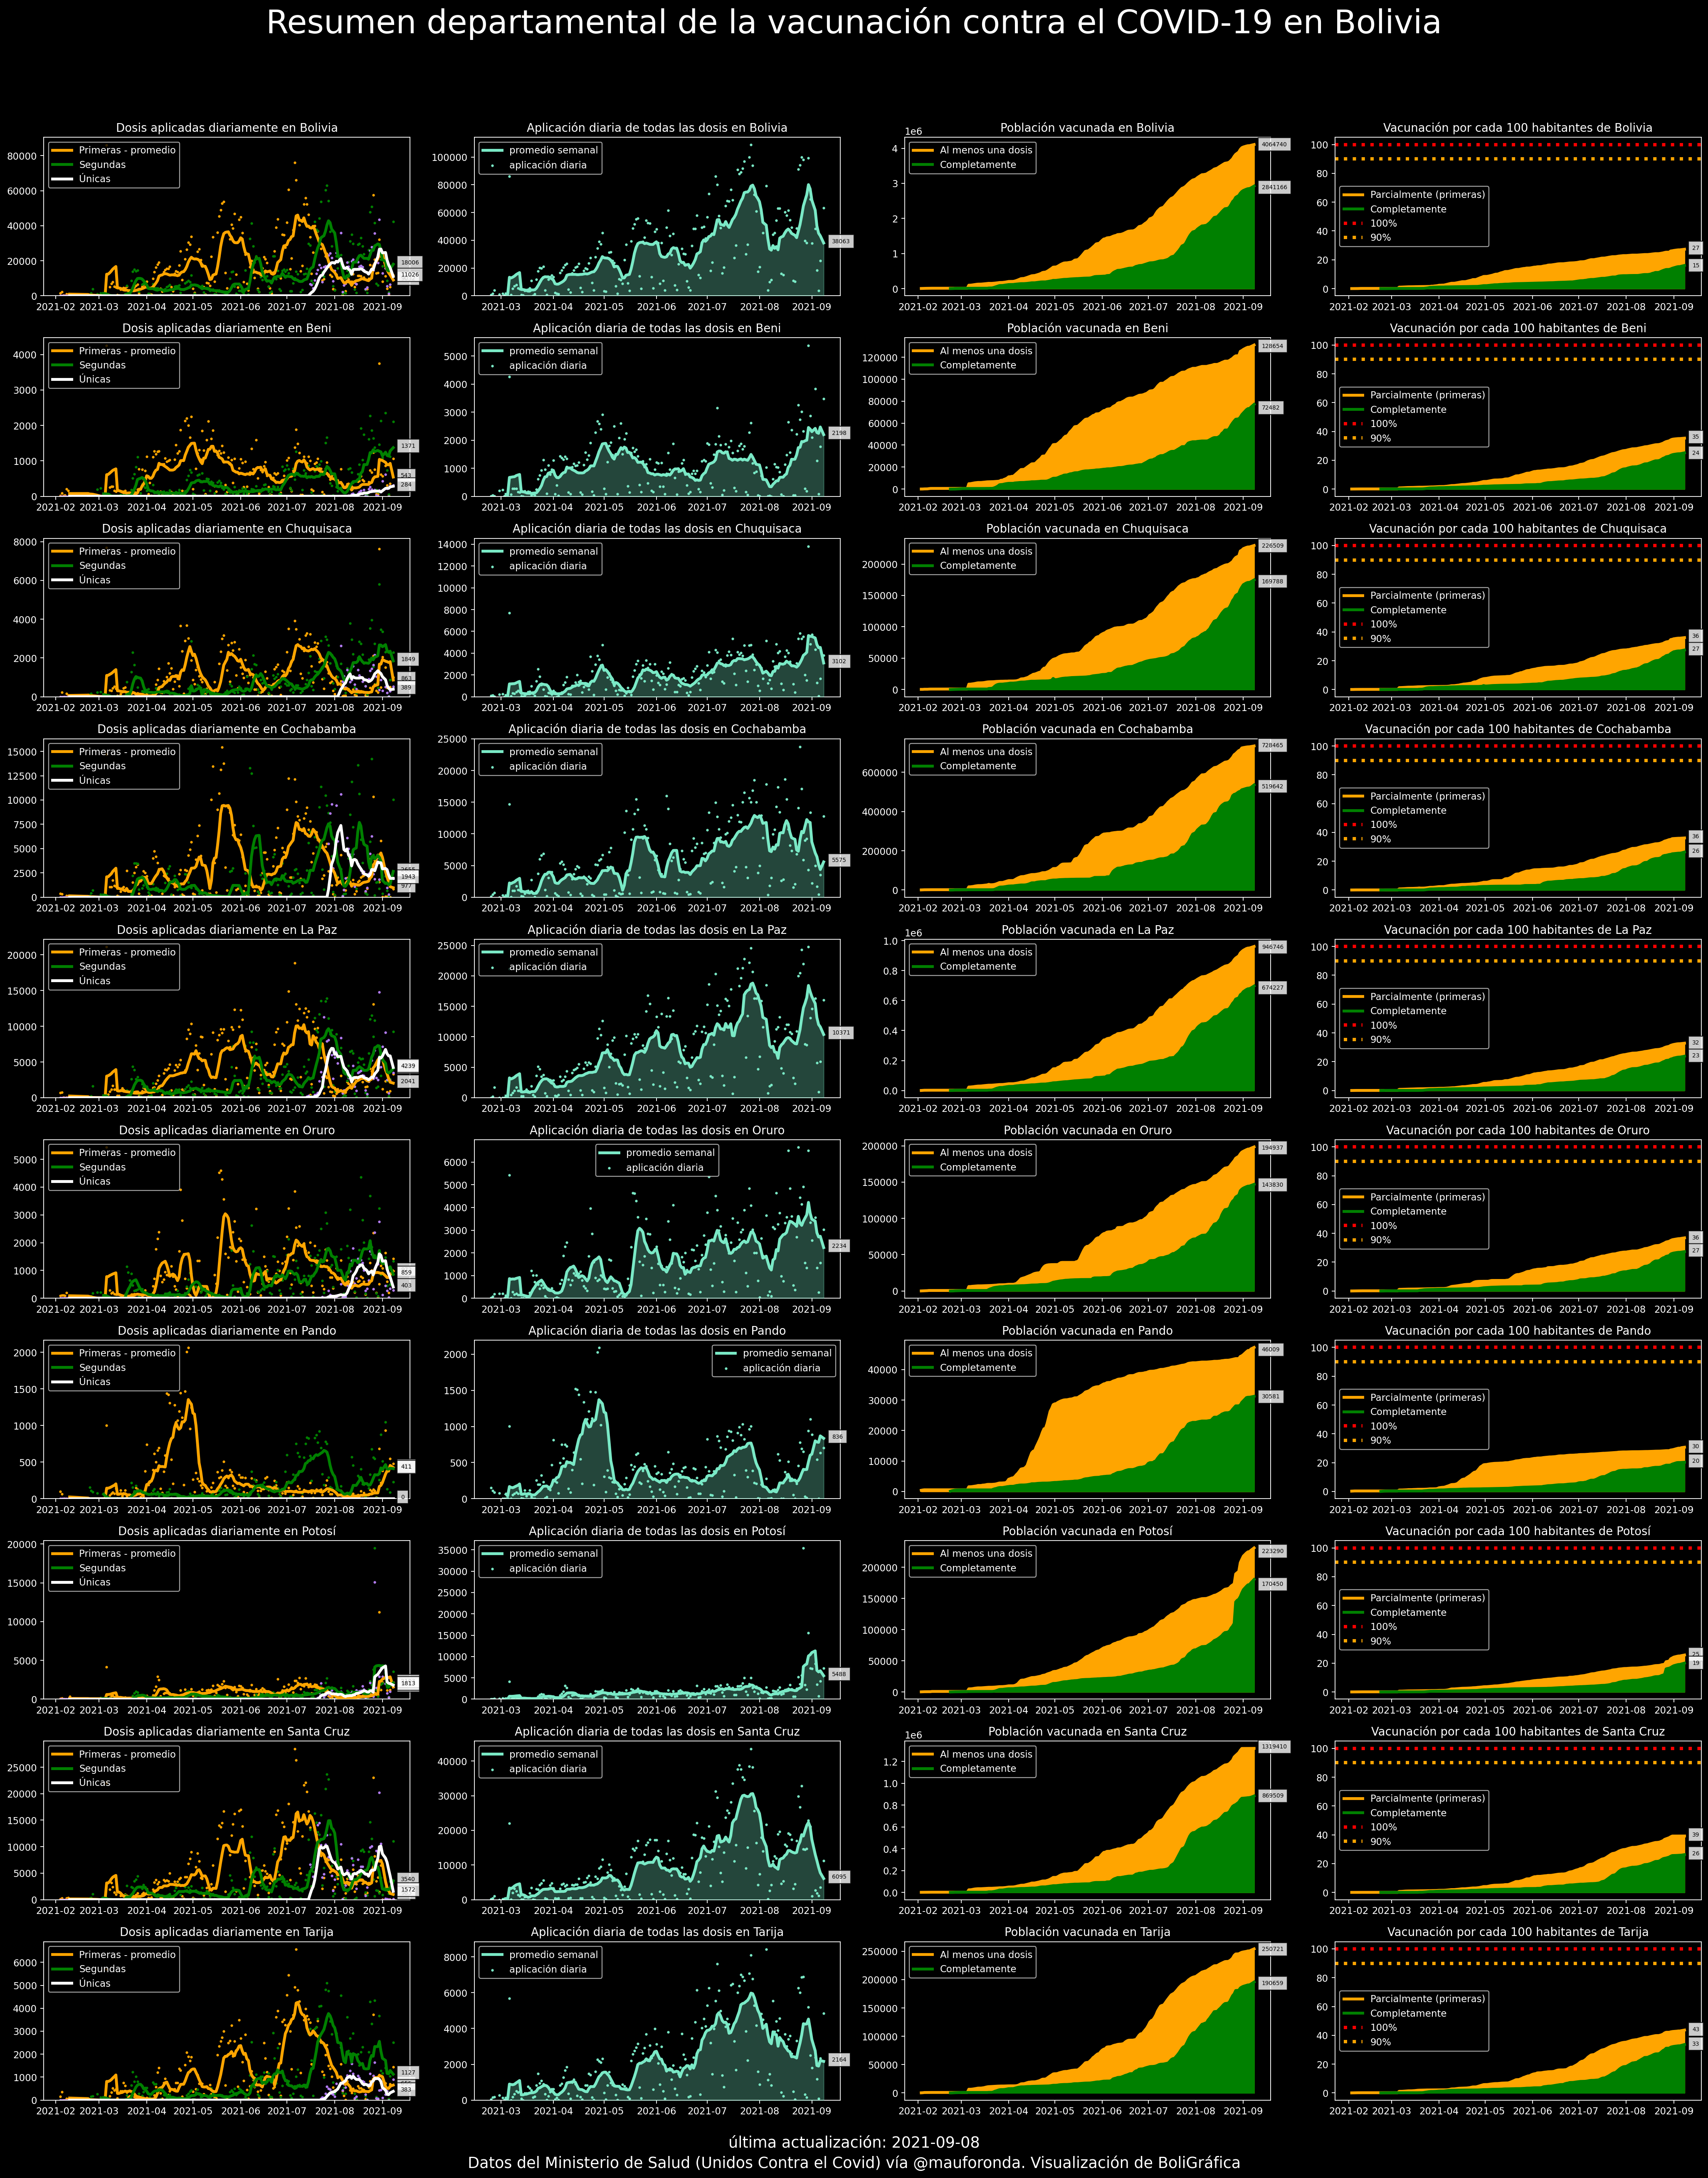

In [77]:
fig, axs = plt.subplots(10,4, figsize = (25,30),
                        dpi = 165
                        )
#axs = axs.flatten()
fig.suptitle("Resumen departamental de la vacunación contra el COVID-19 en Bolivia", y=1.03, fontsize = 34)
fig.text(0.5,-.01,horizontalalignment='center',s=ultima_actualizacion, fontsize=16)
fig.text(0.5,-.02,horizontalalignment='center',s=atribucion, fontsize=16)

fig.set_facecolor(background_color1)



for i in range(10):
  #axs[i,0].grid(zorder=1)
  axs[i,0].set_title("Dosis aplicadas diariamente en {}".format(primeras_dia.columns[i]))
  axs[i,0].scatter(primeras_dia.index, primeras_dia.iloc[:,i], color = color_vac_parcial1, s=3, zorder=2)
  axs[i,0].plot(primeras_dia.index, primeras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_parcial2, label="Primeras - promedio", linewidth = 3, zorder=3)
  axs[i,0].scatter(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i], color = color_vac_completa1, s=3, zorder=2)
  axs[i,0].plot(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_completa2, label="Segundas", linewidth = 3, zorder=3)  
  
  axs[i,0].scatter(unicas_dia.index, unicas_dia.iloc[:,i], color = color3, s=3, zorder=2)
  axs[i,0].plot(unicas_dia.index, unicas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = "w", label="Únicas", linewidth = 3, zorder=3)  
  
  axs[i,0].legend(loc="upper left")
  axs[i,0].legend(loc="upper left")
  annotate_last_nonflat(primeras_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(unicas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

  
  axs[i,0].set_ylim(bottom=0)


for i in range(10):
 # axs[i,1].grid(zorder=1)
  axs[i,1].set_title("Aplicación diaria de todas las dosis en {}".format(primeras_dia.columns[i]))
  axs[i,1].scatter(ambas_dia.index, ambas_dia.iloc[:,i], color = color_total_dosis1, label="aplicación diaria", s=3, zorder=2)
  axs[i,1].plot(ambas_dia.index, ambas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, label="promedio semanal", linewidth = 3, zorder=3)
  axs[i,1].fill_between(ambas_dia.index, ambas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, zorder=3, alpha=.3)
  axs[i,1].legend()
  annotate_last_nonflat(ambas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,1), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  axs[i,1].set_ylim(bottom=0)



for i in range(10):
  #axs[i,2].grid(zorder=1)
  axs[i,2].set_title("Población vacunada en {}".format(primeras_dia.columns[i]))
  axs[i,2].plot(almenos_una_acum.iloc[:,i].interpolate(), label = "Al menos una dosis", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,2].fill_between(almenos_una_acum.index, almenos_una_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,2].plot(segundas_acum.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,2].fill_between(segundas_acum.index, segundas_acum.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,2].legend()
  annotate_last_nonflat(almenos_una_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

for i in range(10):
  #axs[i,3].grid(zorder=1)
  axs[i,3].set_title("Vacunación por cada 100 habitantes de {}".format(primeras_dia.columns[i]))
  axs[i,3].plot(almenos_una_pc_acum.iloc[:,i].interpolate(), label = "Parcialmente (primeras)", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,3].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,3].plot(segundas_acum_pc.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,3].fill_between(segundas_acum_pc.index, segundas_acum_pc.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,3].axhline(y=100, color='red', linestyle='dotted',label="100%", linewidth=3.5)
  axs[i,3].axhline(y=90, color='orange', linestyle='dotted',label="90%", linewidth=3.5)
  axs[i,3].legend(loc= "center left")
  annotate_last_nonflat(almenos_una_pc_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

fig.tight_layout()

fig.savefig(directory + "resumen_detallado.jpg", bbox_inches="tight")

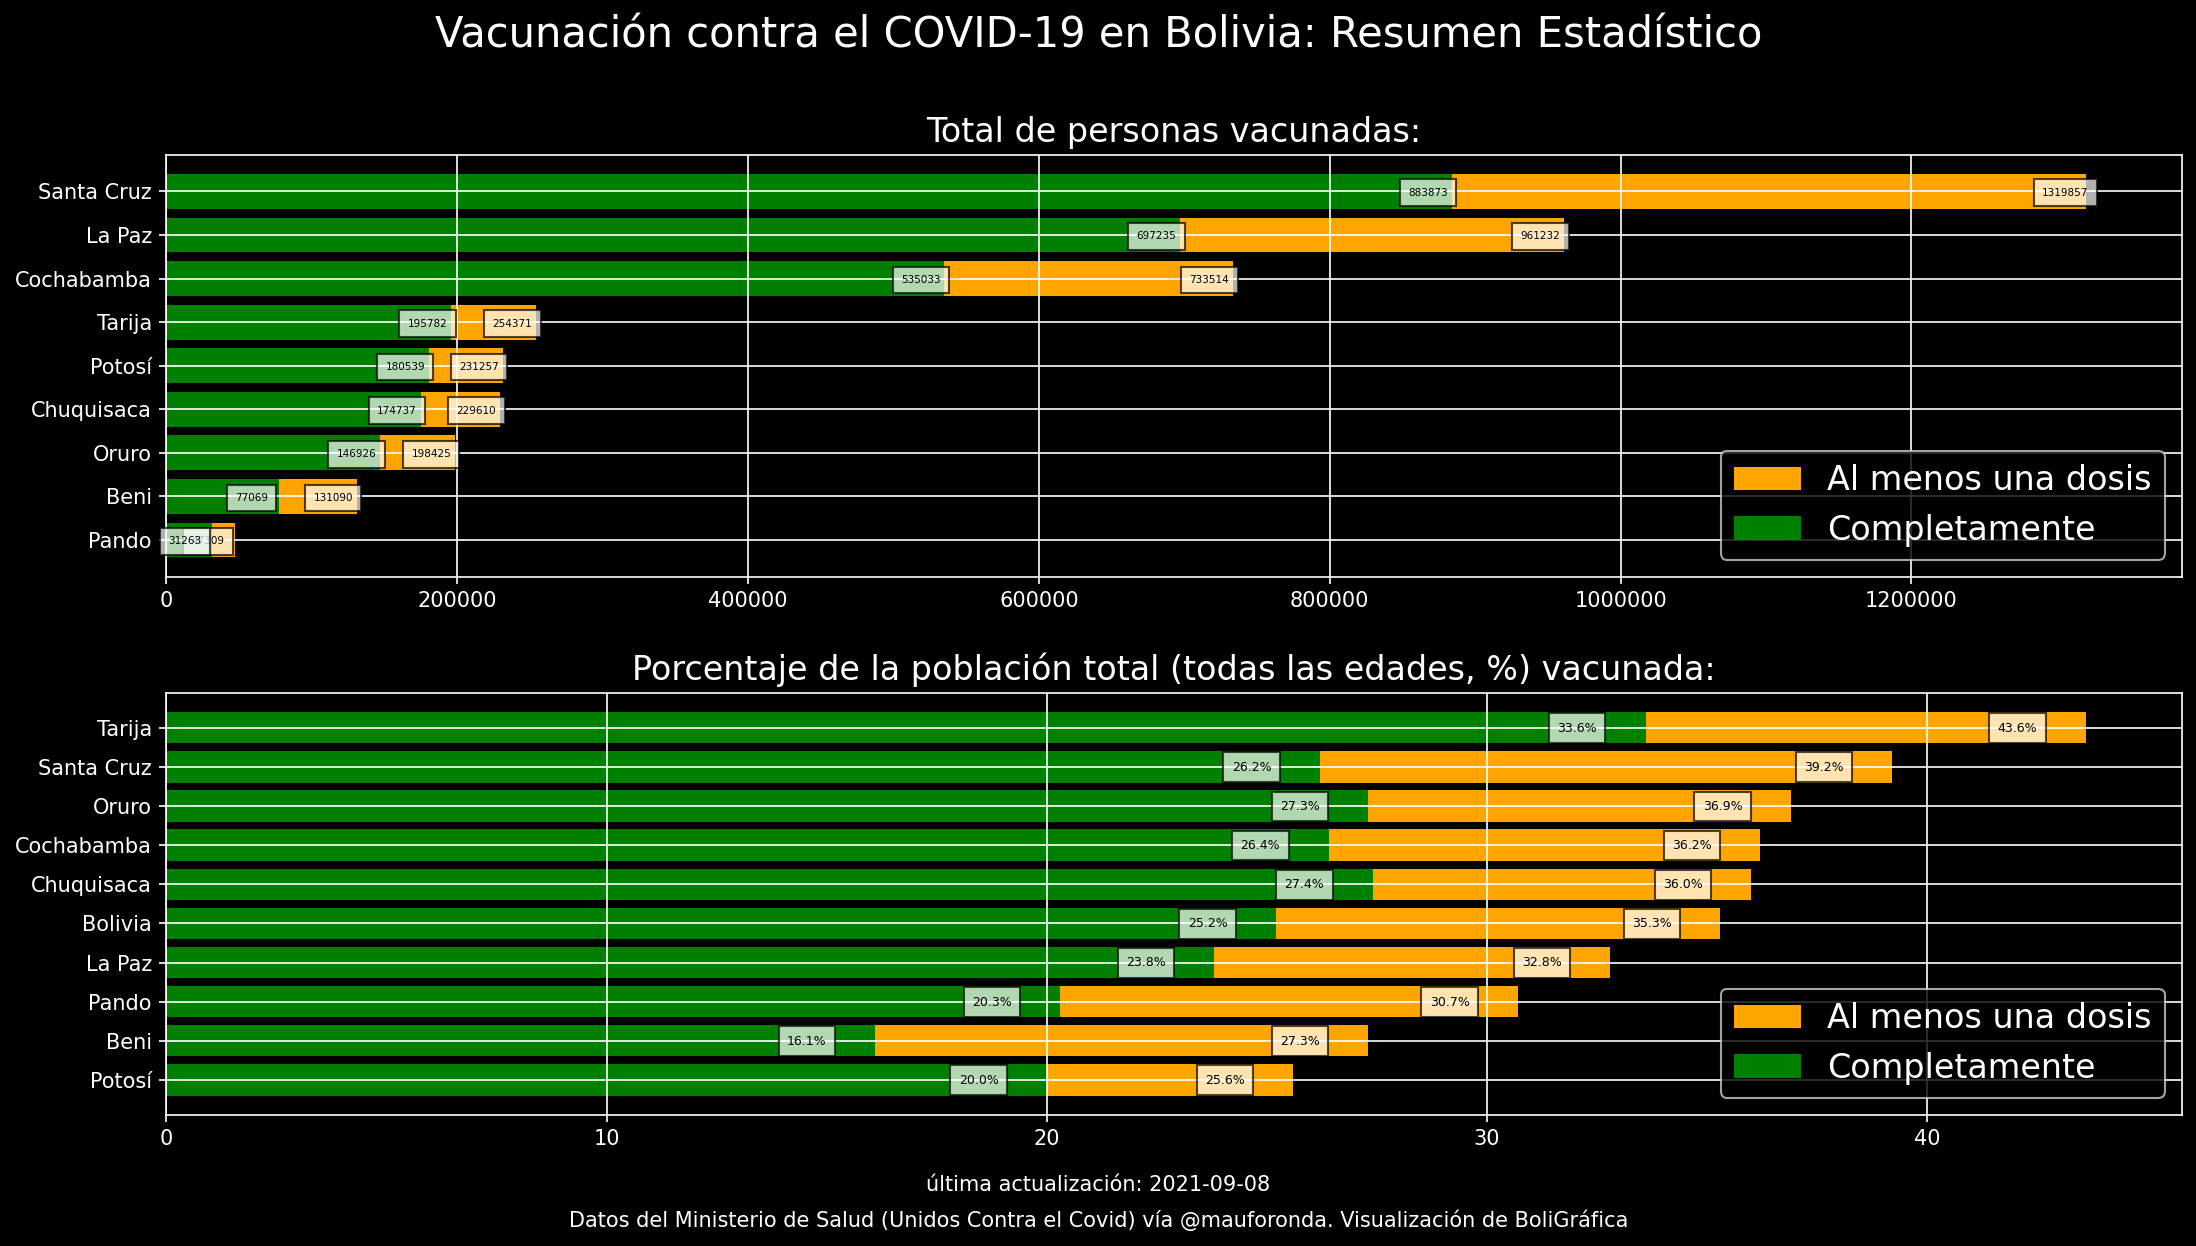

In [70]:
fig, axs = plt.subplots(2,1, figsize=(15,8),dpi=150)
axs=axs.flatten()

fig.suptitle("Vacunación contra el COVID-19 en Bolivia: Resumen Estadístico", fontsize=20)
fig.text(0.5,.0,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,-.03,horizontalalignment='center',s=atribucion, fontsize=10)

fig.set_facecolor(background_color1)

sort_primeras = almenos_una_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
sort_segundas = segundas_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
axs[0].grid(zorder=1)
axs[0].set_title("Total de personas vacunadas:", fontsize=16)
bar1 = axs[0].barh(sort_primeras.index, sort_primeras, label="Al menos una dosis", color=color_vac_parcial2)
axs[0].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2)
axs[0].legend(fontsize=16)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
annotate_bar(bar1,0, fontsize=5, y_offset=.3, x_offset=-30000, alpha=.7)



sort_primeras = almenos_una_pc_acum.iloc[-1,:].sort_values(ascending=True).round(1)
sort_segundas = segundas_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
axs[1].grid(zorder=1)
axs[1].set_title("Porcentaje de la población total (todas las edades, %) vacunada:", fontsize=16)
axs[1].barh(sort_primeras.index, sort_primeras, label="Al menos una dosis", color=color_vac_parcial2)
axs[1].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2)
axs[1].legend(fontsize=16)
annotate_bar(sort_primeras,1, fontsize=6, y_offset=.3, x_offset=-2, alpha=.7, end_text="%")

fig.tight_layout(pad=2)
fig.savefig(directory + "resumen_departamental.jpg", bbox_inches="tight")

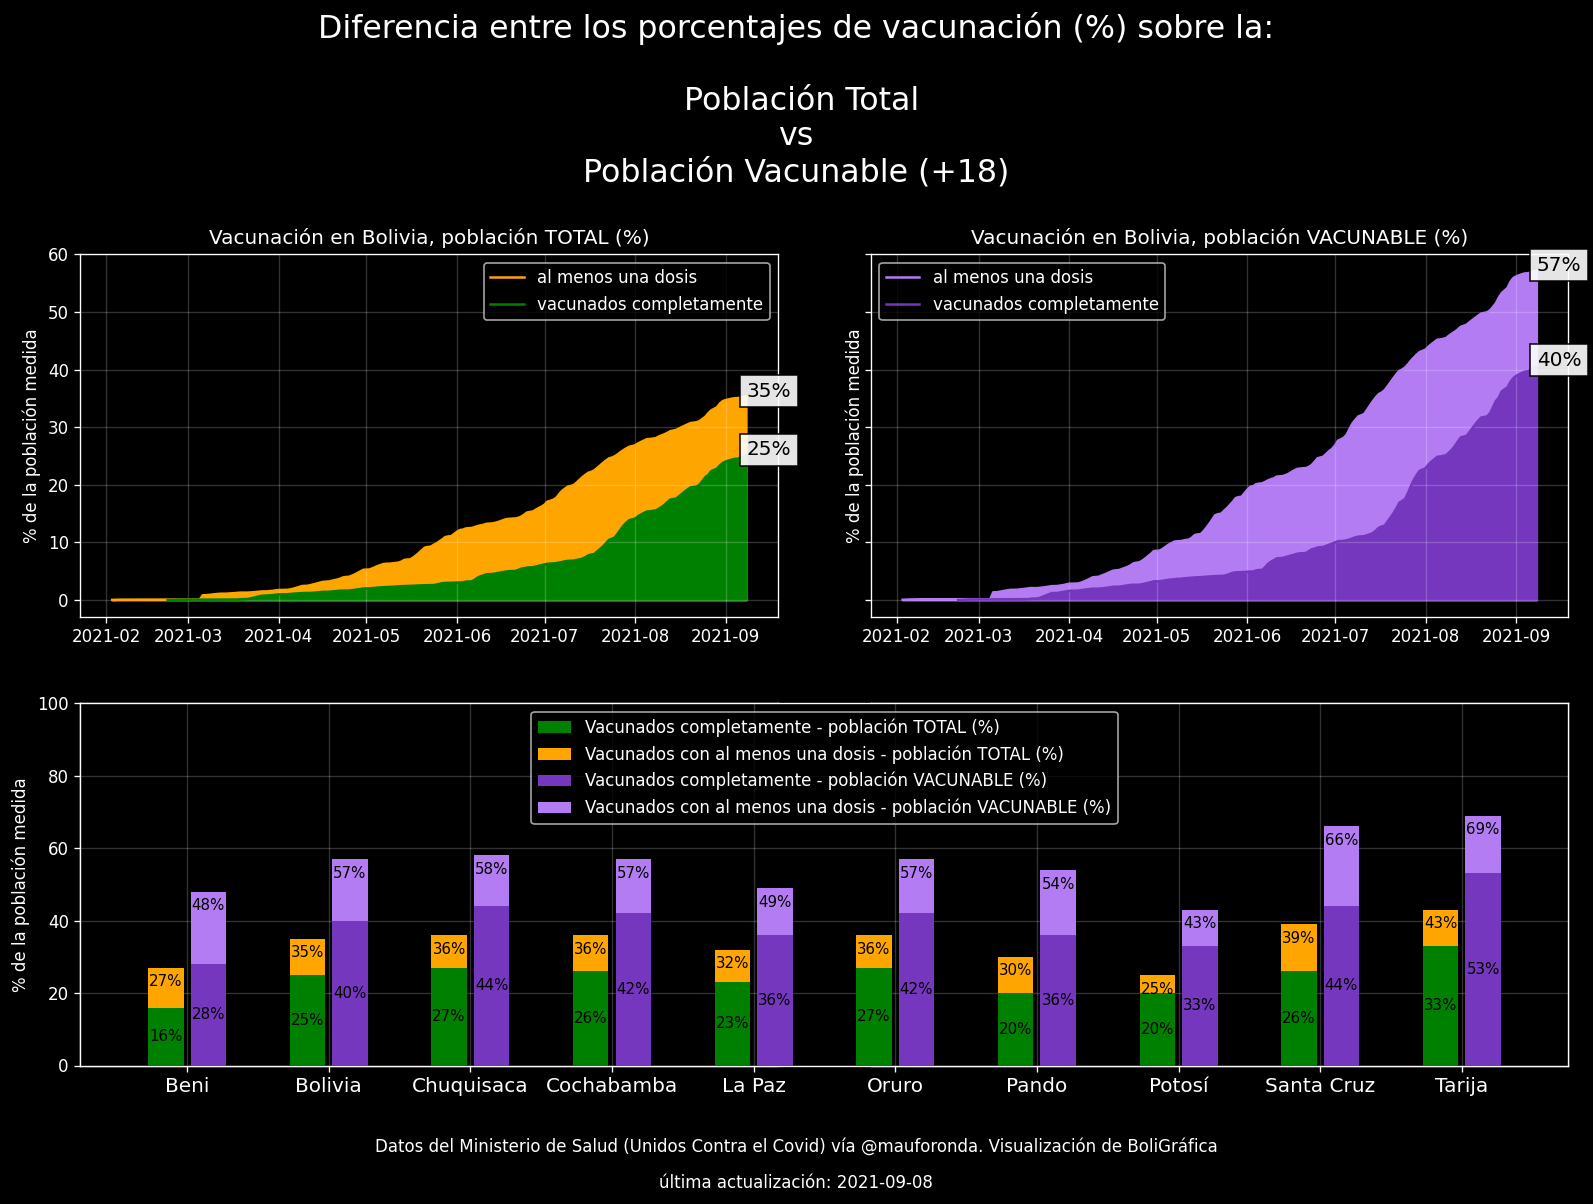

In [81]:
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(14,10), sharey=True, dpi=120)
axs = axs.flatten()

fig.suptitle("Diferencia entre los porcentajes de vacunación (%) sobre la:\n\n Población Total\nvs\nPoblación Vacunable (+18)", fontsize=19, y=.95)

axs[0].set_title("Vacunación en Bolivia, población TOTAL (%)")
axs[0].grid(alpha=.2)
axs[0].plot(almenos_una_pc_acum.Bolivia, label="al menos una dosis", color=color_vac_parcial2)
axs[0].plot(completa_pc_acum.Bolivia, label="vacunados completamente", color = color_vac_completa2)
axs[0].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.Bolivia, color=color_vac_parcial2)
axs[0].fill_between(completa_pc_acum.index, completa_pc_acum.Bolivia, color = color_vac_completa2)
axs[0].set_ylabel("% de la población medida")
axs[0].legend()

axs[1].set_title("Vacunación en Bolivia, población VACUNABLE (%)")
axs[1].grid(alpha=.2)
axs[1].plot(almenos_una_vacunable_acum.Bolivia, label="al menos una dosis", color = color3)
axs[1].plot(completa_vacunable_acum.Bolivia, label="vacunados completamente", color = color4)
axs[1].fill_between(almenos_una_vacunable_acum.index, almenos_una_vacunable_acum.Bolivia, color = color3)
axs[1].fill_between(completa_vacunable_acum.index, completa_vacunable_acum.Bolivia, color = color4)
axs[1].set_ylabel("% de la población medida")
axs[1].legend()

axs[2].get_xaxis().set_visible(False)
axs[3].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)


x=list(range(10))
width=.25
b=.15
x1 = [i + b for i in x]
x2 = [i - b  for i in x]

axs[3] = fig.add_subplot(212)
axs[3].set_title("", fontsize=18)
axs[3].grid(alpha=.2)

bar1 = axs[3].bar(x2,completa_pc_acum.iloc[-1,:].astype(int), width = width, label="Vacunados completamente - población TOTAL (%)", zorder=3, color=color_vac_completa2)
bar2 = axs[3].bar(x2,almenos_una_pc_acum.iloc[-1,:].astype(int), width = width, label="Vacunados con al menos una dosis - población TOTAL (%)", zorder=2, color=color_vac_parcial2)
bar3 = axs[3].bar(x1,completa_vacunable_acum.iloc[-1,:].astype(int), width = width, label="Vacunados completamente - población VACUNABLE (%)", zorder=3, color = color4)
bar4 = axs[3].bar(x1,almenos_una_vacunable_acum.iloc[-1,:].astype(int), width = width, label="Vacunados con al menos una dosis - población VACUNABLE (%)", zorder=2, color = color3)

annotate_last_flat(completa_pc_acum,1, end_text="%", alpha=.9)
annotate_last_flat(almenos_una_pc_acum,1, end_text="%", alpha=.9)
annotate_last_flat(completa_vacunable_acum,1, axis=1, end_text="%", alpha=.9)
annotate_last_flat(almenos_una_vacunable_acum,1, axis=1, end_text="%", alpha=.9)

axs[3].bar_label(bar1, color="black", label_type="center", fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar2, color="black", padding=-13, fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar3, color="black", label_type="center", fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar4, color="black", padding=-13, fontsize=9, fmt='%.0f%%')


axs[3].set_xticks(x)
axs[3].set_xticklabels(completa_pc_acum.columns, fontsize=12)
axs[3].set_ylim(0,100)
axs[3].set_ylabel("% de la población medida")
axs[3].legend(loc = "upper center")

fig.text(0.5,-.03,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.0,horizontalalignment='center',s=atribucion, fontsize=10)

fig.tight_layout(pad=3)

fig.savefig(directory + "total_vs_vacunable.jpg", bbox_inches="tight")